In [ ]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [ ]:

train_dir = r"C:\PYTHON\Face_emotion\Datasets\fer2013\train" # Directory containing the training data
test_dir = r"C:\PYTHON\Face_emotion\Datasets\fer2013\test"  # Directory containing the validation data


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential

# Model definition
model = Sequential()

# Input layer
model.add(Input(shape=(48, 48, 1)))

# Convolutional layers with Batch Normalization, Max Pooling, and Dropout
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the outputs for the dense layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Output layer
model.add(Dense(7, activation='softmax'))


In [5]:

# Model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 4,496,903 (17.15 MB)

 Trainable params: 4,492,935 (17.14 MB)

 Non-trainable params: 3,968 (15.50 KB)

In [6]:
img_size=48

In [7]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [8]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )



Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [9]:
model.compile(
    optimizer = Adam(learning_rate=0.001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )

In [10]:
epochs = 45
batch_size = 64

In [11]:
history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/45


c:\PYTHON\Face_emotion\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.2066 - loss: 2.2538 - val_accuracy: 0.2584 - val_loss: 1.9820
Epoch 2/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 407s 1s/step - accuracy: 0.2890 - loss: 1.8163 - val_accuracy: 0.3582 - val_loss: 1.7920
Epoch 3/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.3801 - loss: 1.6025 - val_accuracy: 0.4099 - val_loss: 1.5418
Epoch 4/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 381s 1s/step - accuracy: 0.4503 - loss: 1.4165 - val_accuracy: 0.5021 - val_loss: 1.3334
Epoch 5/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.5010 - loss: 1.3080 - val_accuracy: 0.5398 - val_loss: 1.2304
Epoch 6/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 343s 954ms/step - accuracy: 0.5324 - loss: 1.2257 - val_accuracy: 0.5189 - val_loss: 1.2761
Epoch 7/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 315s 877ms/step - accuracy: 0.5366 - loss: 1.2045 - val_accuracy: 0.5705 - val_loss: 1.1298
Epoch 8/45
359/359 ━━━━━━━━━━━━━━━━━━━━ 317s 882ms/step - accuracy: 0.5596 - loss: 1.1655 - val_accura

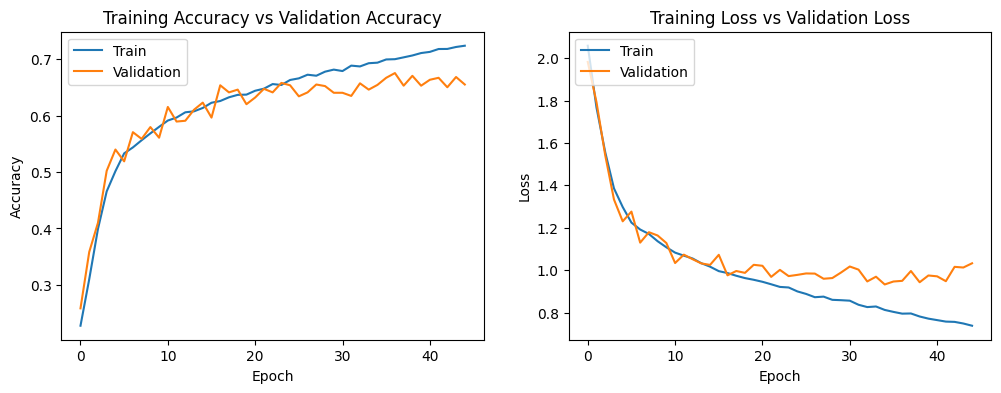

In [12]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [25]:
model.save_weights('model_weights_FER.weights.h5')

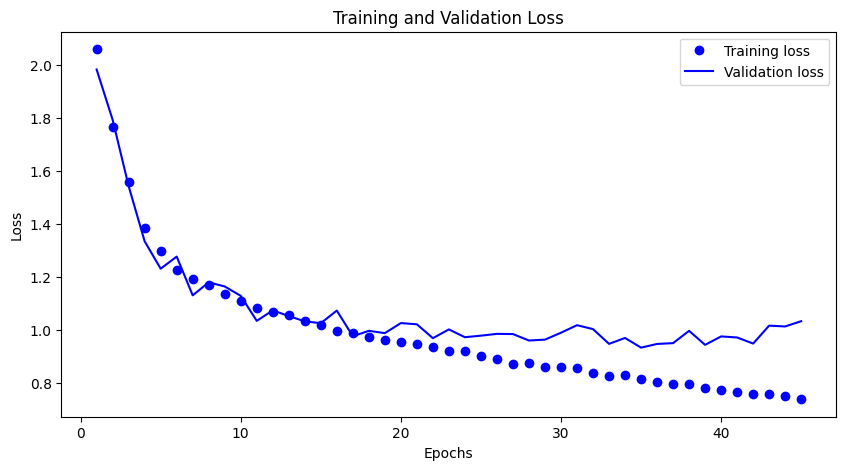

In [16]:
# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Define epochs range
epochs = range(1, len(train_loss) + 1)

# Create the plot
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, 'bo', label='Training loss')  # 'bo' for blue dots
plt.plot(epochs, val_loss, 'b', label='Validation loss')   # 'b' for blue line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

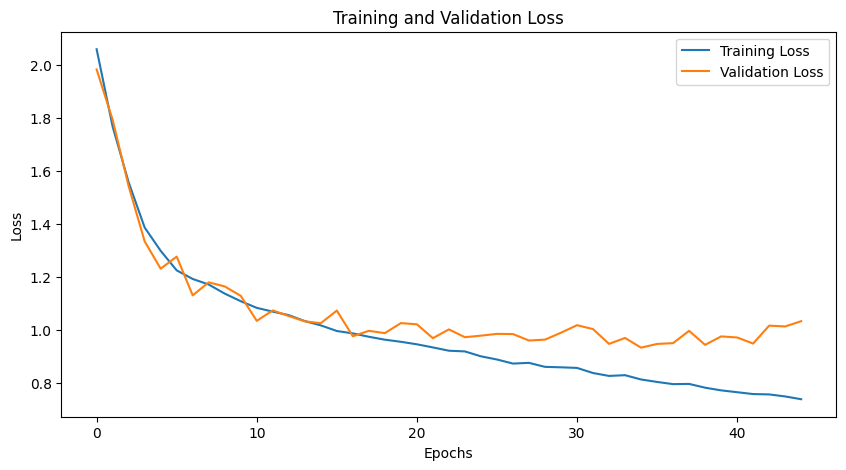

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


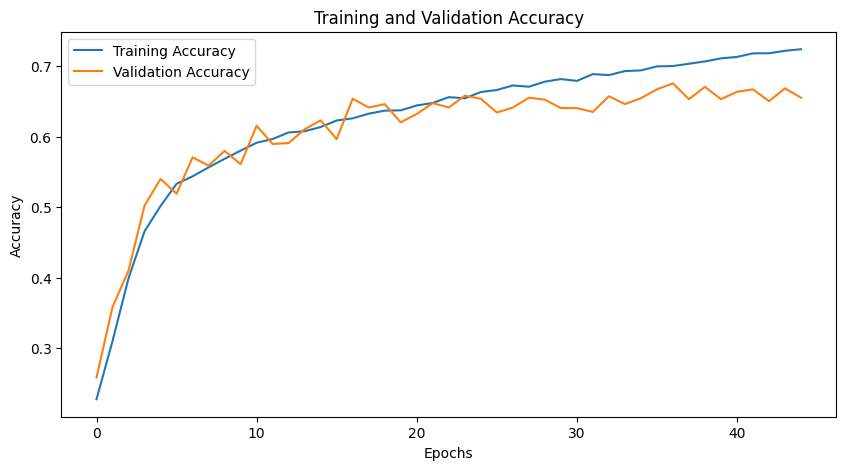

In [18]:
train_accuracy = history.history.get('accuracy')
val_accuracy = history.history.get('val_accuracy')

if train_accuracy and val_accuracy:
    plt.figure(figsize=(10, 5))
    plt.plot(train_accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()
    plt.show()


In [20]:
# Print the keys available in history.history
print(history.history.keys())

# Access specific metrics
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Training Loss: [2.0583927631378174, 1.7665337324142456, 1.556177020072937, 1.385698914527893, 1.2977664470672607, 1.2240597009658813, 1.1916711330413818, 1.1706830263137817, 1.136392593383789, 1.1078014373779297, 1.0826303958892822, 1.0684101581573486, 1.0550696849822998, 1.032746434211731, 1.0164868831634521, 0.9953636527061462, 0.9862956404685974, 0.973580539226532, 0.9625641107559204, 0.9545915722846985, 0.9451516270637512, 0.9333902597427368, 0.9209557771682739, 0.9183074235916138, 0.8997668623924255, 0.887861967086792, 0.8724238872528076, 0.8751453161239624, 0.8600565791130066, 0.8583479523658752, 0.8560579419136047, 0.8367926478385925, 0.8258628249168396, 0.8286447525024414, 0.8124282360076904, 0.8031753897666931, 0.7948879599571228, 0.7956961989402771, 0.7814423441886902, 0.7713695764541626, 0.7644131183624268, 0.7574110627174377, 0.7560575008392334, 0.7484384775161743, 0.7379452586174011]
Validation Loss: [1.9820038080

Found 28709 images belonging to 7 classes.


c:\PYTHON\Face_emotion\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 126s 279ms/step


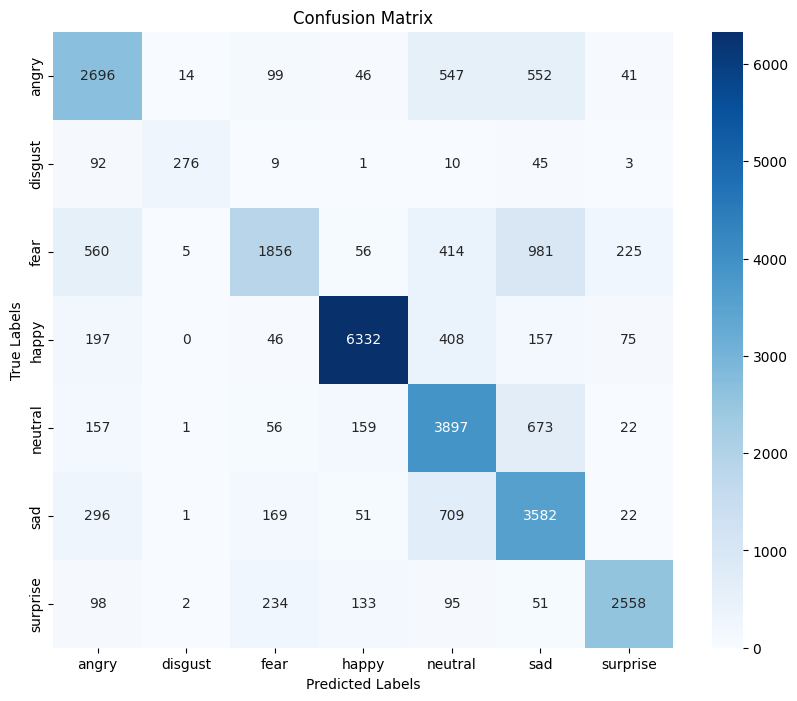

Classification Report:
               precision    recall  f1-score   support

       angry       0.66      0.67      0.67      3995
     disgust       0.92      0.63      0.75       436
        fear       0.75      0.45      0.57      4097
       happy       0.93      0.88      0.91      7215
     neutral       0.64      0.78      0.71      4965
         sad       0.59      0.74      0.66      4830
    surprise       0.87      0.81      0.84      3171

    accuracy                           0.74     28709
   macro avg       0.77      0.71      0.73     28709
weighted avg       0.75      0.74      0.74     28709



In [28]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define your model architecture
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential

# Model definition
model = Sequential()

# Input layer (explicitly defined)
model.add(Input(shape=(48, 48, 1)))

# Convolutional layers with Batch Normalization, Max Pooling, and Dropout
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the outputs for the dense layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

# Output layer
model.add(Dense(7, activation='softmax'))


# Load the saved weights
model.load_weights('C:\PYTHON\Face_emotion\model_weights_FER.weights.h5')

# Data path
datapath = r"C:\PYTHON\Face_emotion\Datasets\emotion_data\train"

# Prepare data using ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
data_generator = datagen.flow_from_directory(
    directory=datapath,
    target_size=(48, 48),
    color_mode='grayscale',  # Adjust based on your data
    batch_size=64,
    class_mode='categorical',
    shuffle=False  # Important to maintain order for evaluation
)

# Predict on the dataset
y_pred = model.predict(data_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot predictions to class indices
y_true = data_generator.classes  # True labels

# Get class labels
class_labels = list(data_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", report)


In [29]:
import h5py

# Load the .h5 file
weights_file = "model_weights_FER.weights.h5"
with h5py.File(weights_file, 'r') as f:
    # List all groups in the file
    print("Keys:", list(f.keys()))
    
    # Inspect a specific group
    for key in f.keys():
        print(f[key])



Keys: ['layers', 'optimizer', 'vars']
<HDF5 group "/layers" (25 members)>
<HDF5 group "/optimizer" (1 members)>
<HDF5 group "/vars" (0 members)>


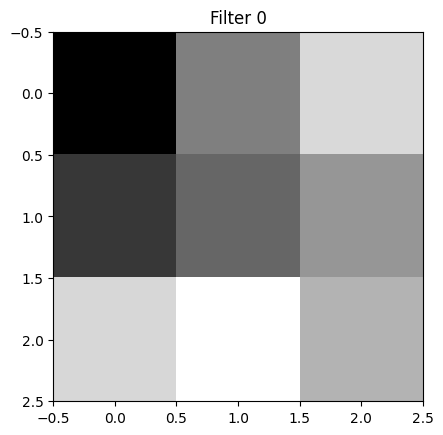

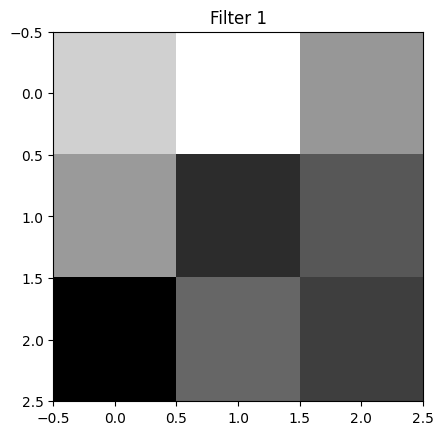

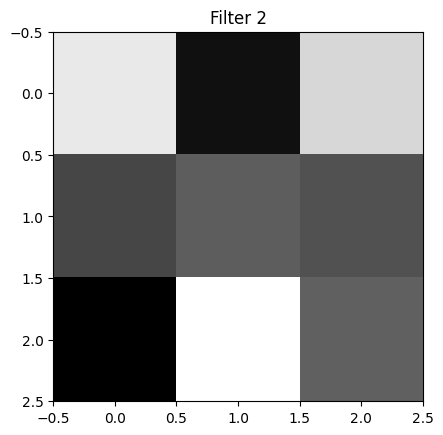

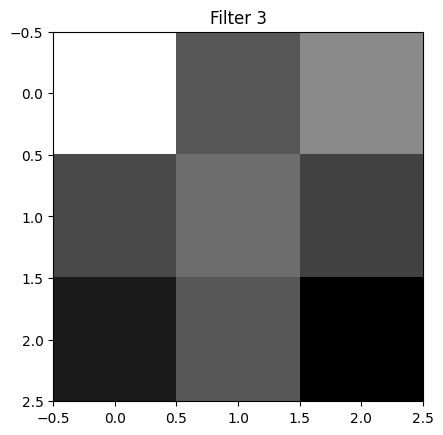

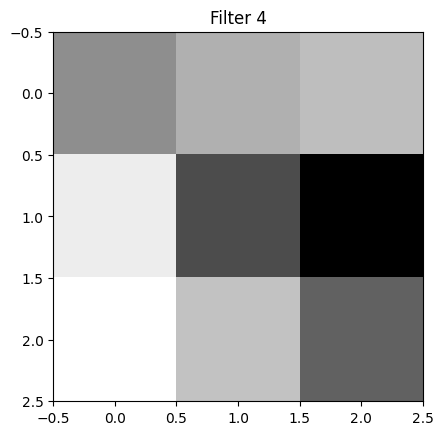

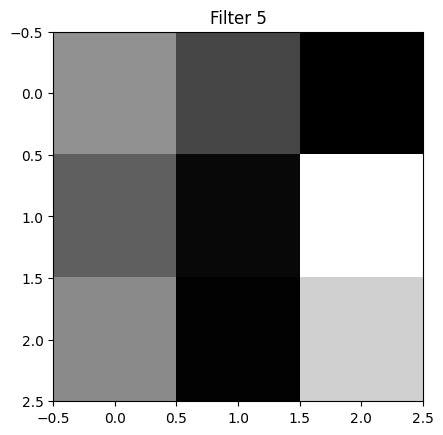

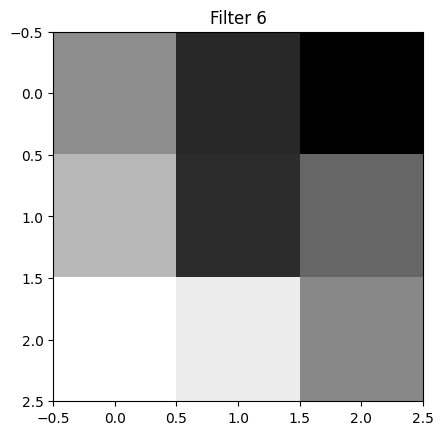

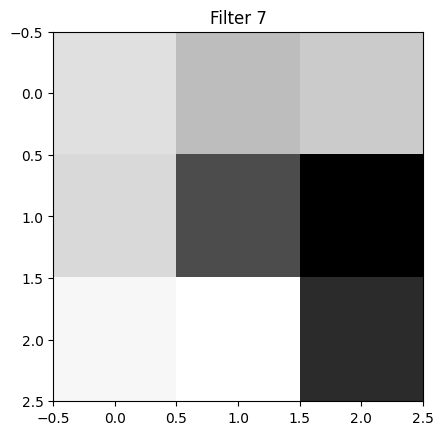

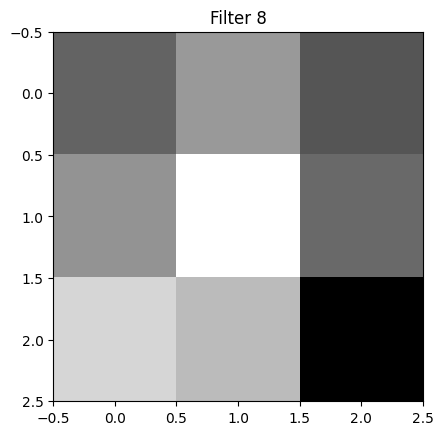

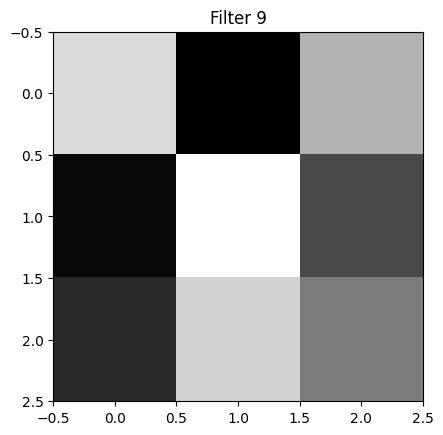

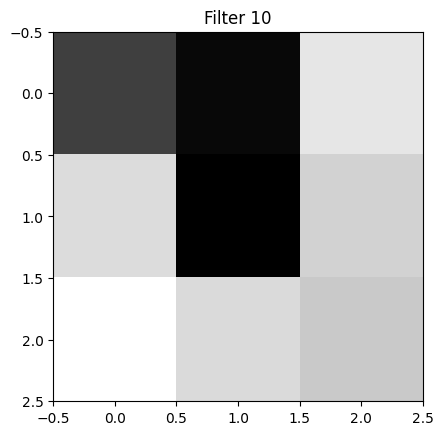

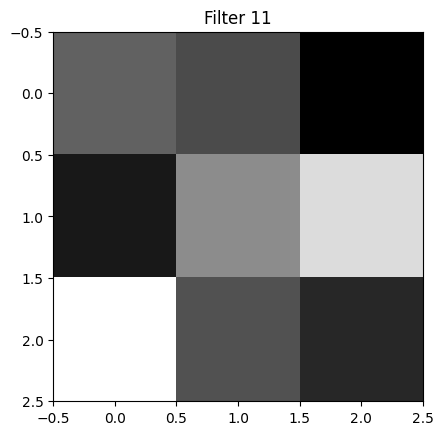

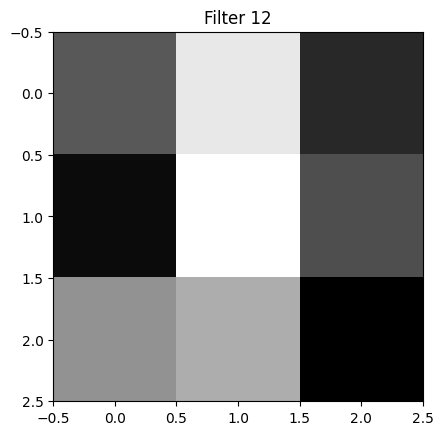

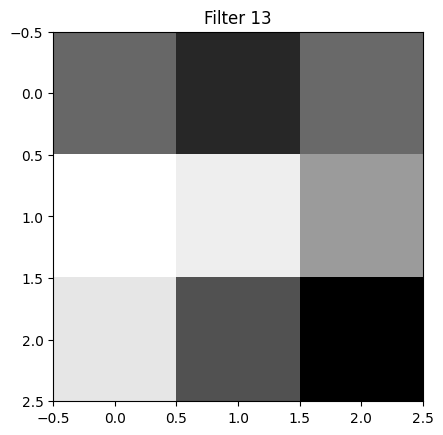

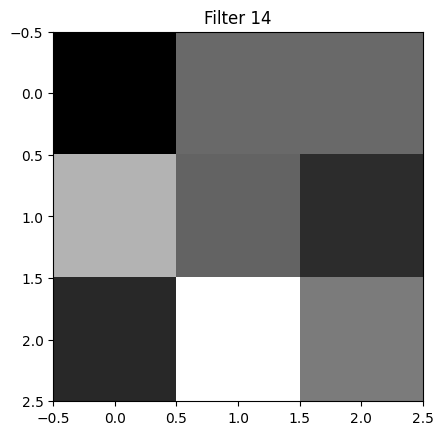

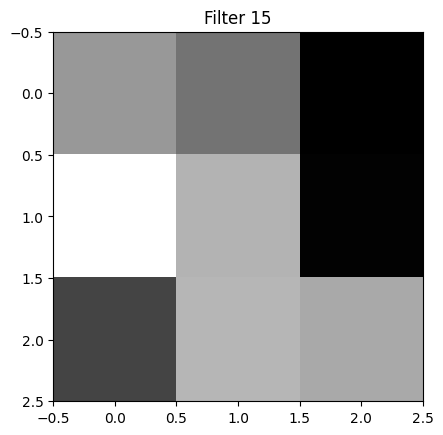

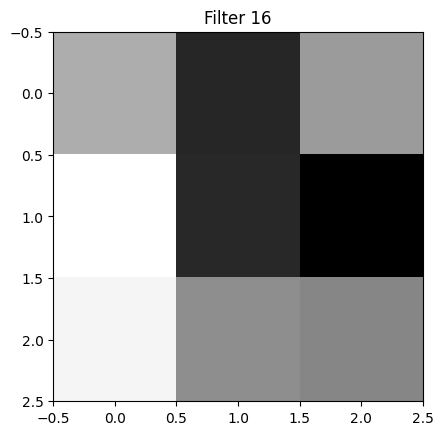

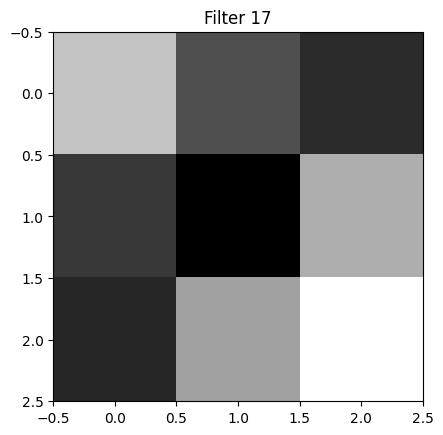

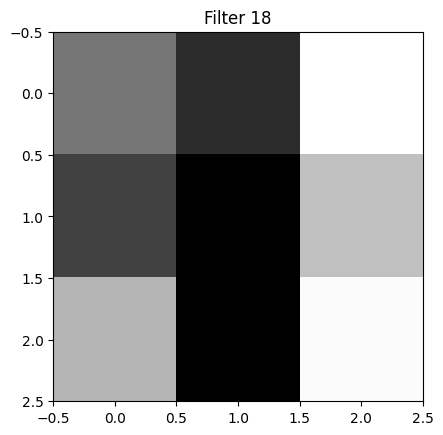

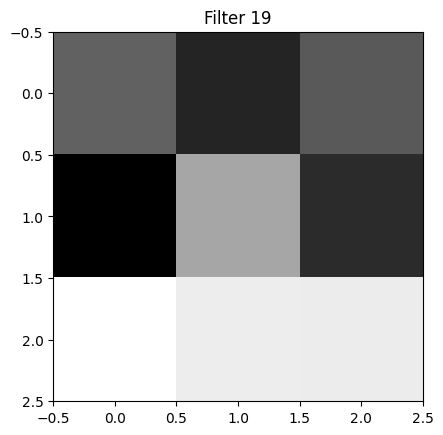

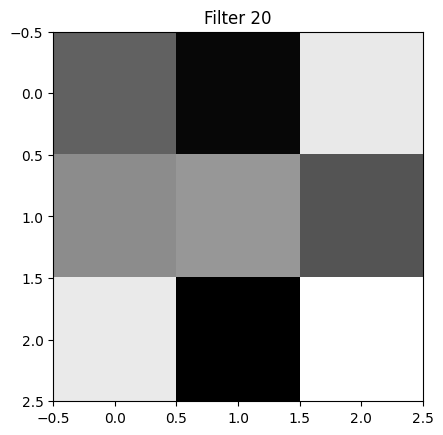

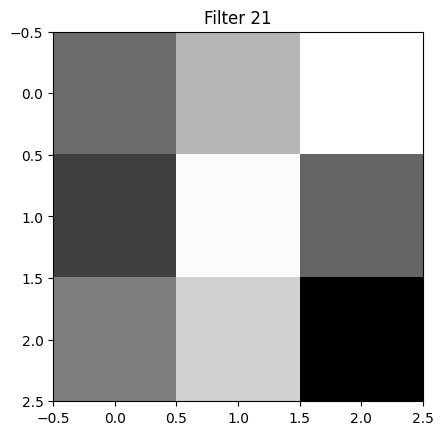

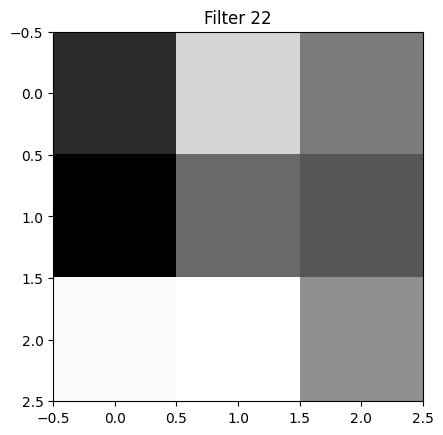

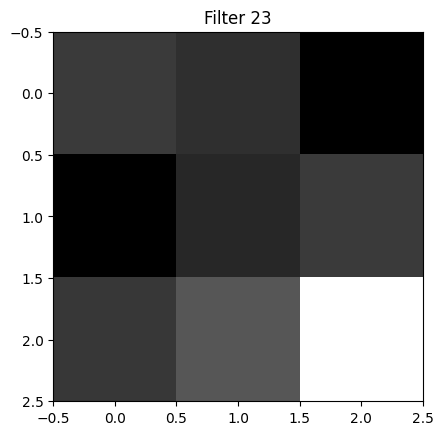

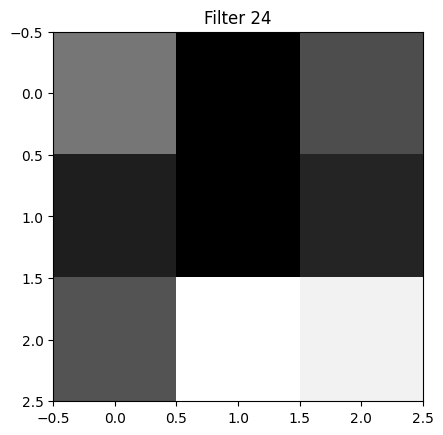

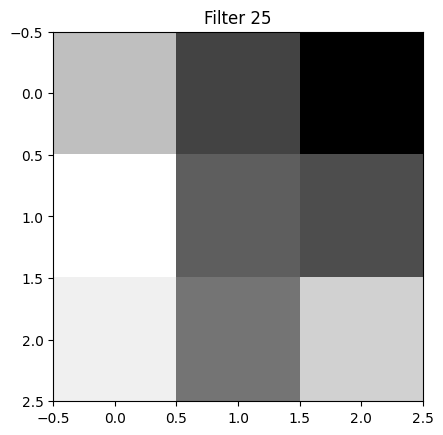

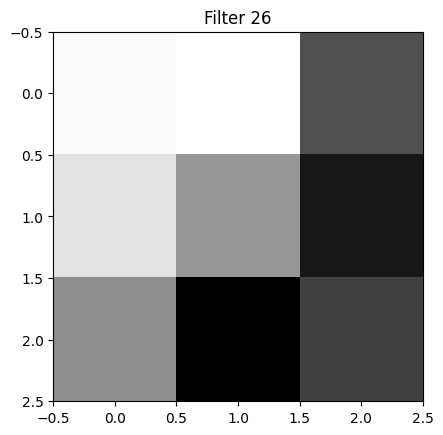

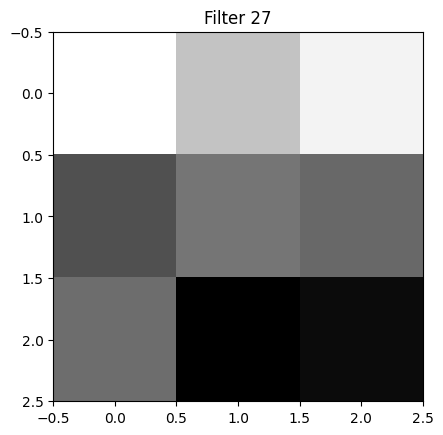

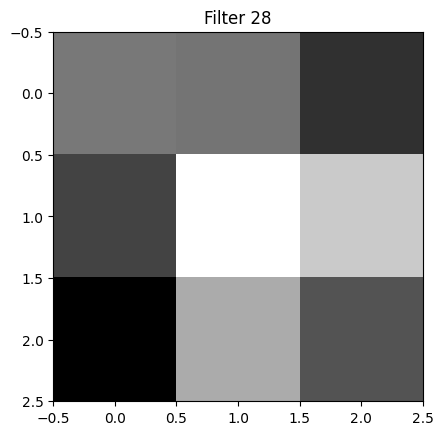

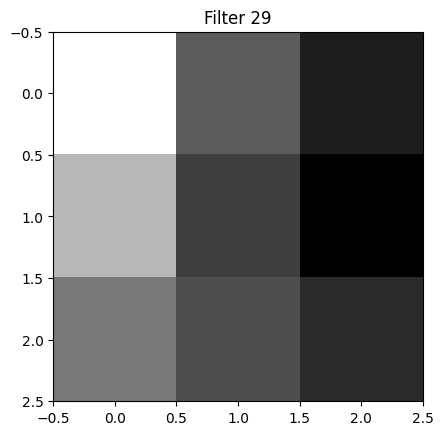

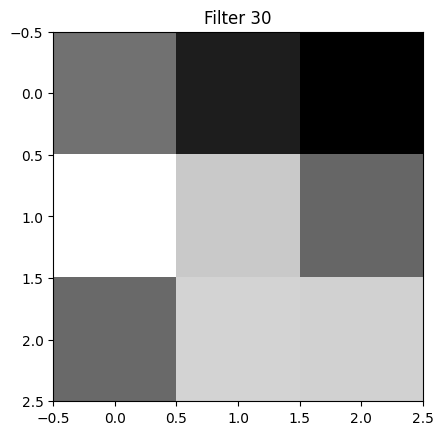

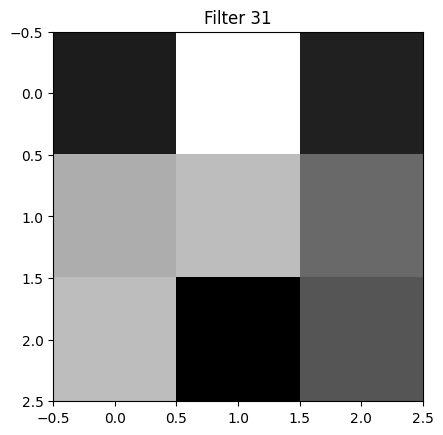

In [30]:
import matplotlib.pyplot as plt

filters, biases = model.layers[0].get_weights()  # For the first conv layer
n_filters = filters.shape[-1]

for i in range(n_filters):
    f = filters[:, :, :, i]
    plt.imshow(f[:, :, 0], cmap='gray')  # Visualizing first channel
    plt.title(f"Filter {i}")
    plt.show()
